                        1950       1960       1970  1990  2000  2012  \
Регіон                                                                 
Крим               23.000000  20.600000  16.000000  13.0   7.3  12.6   
Вінницька          22.400000  19.200000  14.200000  12.4   8.4  11.2   
Волинська          24.700000  25.000000  17.900000  15.3  11.2  14.8   
Дніпропетровська   20.400000  20.400000  15.100000  12.3   7.1  11.2   
Донецька           27.100000  21.400000  14.000000  10.9   6.1   9.8   
Житомирська        26.100000  22.300000  15.900000  12.9   8.9  12.2   
Закарпатська       31.400000  27.300000  20.700000  16.8  11.5  15.1   
Запорізька         21.900000  19.700000  15.000000  12.4   7.1  10.6   
Івано-Франківська  24.300000  24.800000  18.200000  15.5  10.3  12.4   
Київська           20.400000  18.900000  15.600000  12.3   7.3  12.2   
Кіровоградська     21.600000  17.100000  14.500000  12.6   7.9  11.0   
Луганська          26.200000  23.500000  14.400000  11.6   6.2  

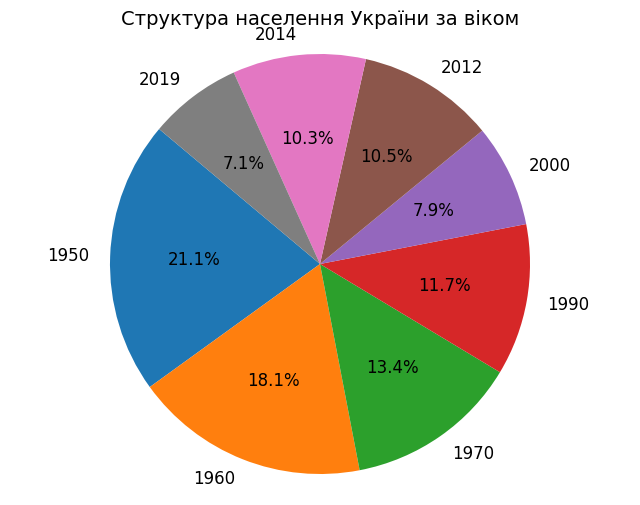

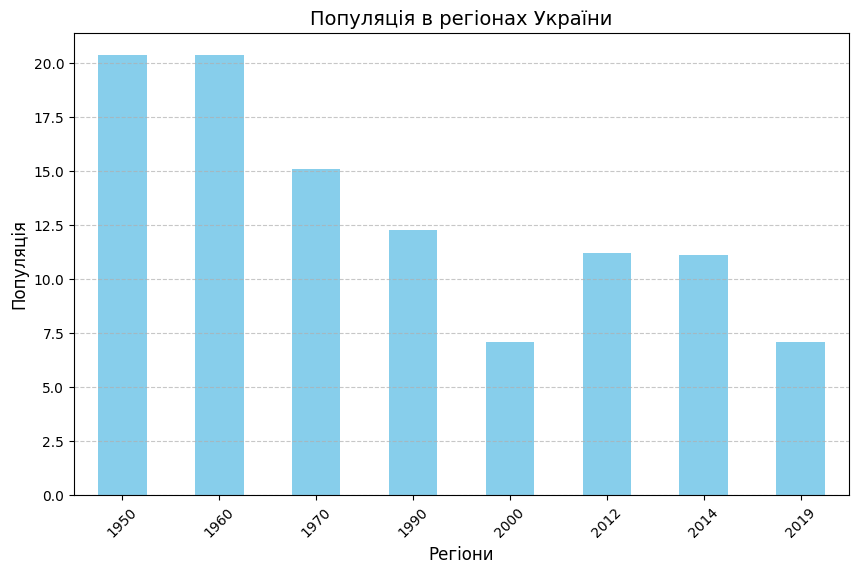

KeyError: 'Чоловіки'

<Figure size 1000x600 with 0 Axes>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Odczyt tabeli ze strony internetowej
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url, thousands=".", na_values="—", decimal=",", index_col=0)
table = tables[12].copy()


# Uzupełnienie brakujących danych średnią wartością
table.fillna(table.mean(), inplace=True)
print(table)
# Wykres kołowy pokazujący strukturę wiekową populacji
plt.figure(figsize=(8, 6))
plt.pie(
    table.iloc[1],
    labels=table.columns,
    autopct="%1.1f%%",
    startangle=140,
    textprops={"fontsize": 12},
)
plt.title("Структура населення України за віком", fontsize=14)
plt.axis("equal")  # Ustawienie równych osi
plt.show()

# Wykres słupkowy pokazujący populację w poszczególnych regionach
plt.figure(figsize=(10, 6))
table.iloc[3].plot(kind="bar", color="skyblue")
plt.title("Популяція в регіонах України", fontsize=14)
plt.xlabel("Регіони", fontsize=12)
plt.ylabel("Популяція", fontsize=12)
plt.xticks(rotation=45)  # Obrót etykiet osi X
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Wykres punktowy pokazujący stosunek płci w różnych grupach wiekowych
plt.figure(figsize=(10, 6))
plt.scatter(table.columns, table.loc["Чоловіки"], label="Чоловіки", color="blue")
plt.scatter(table.columns, table.loc["Жінки"], label="Жінки", color="red")
plt.title("Стосунок чоловіків і жінок за віком", fontsize=14)
plt.xlabel("Вік", fontsize=12)
plt.ylabel("Кількість", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()